In [2]:
import numpy as np
import matplotlib.pyplot as plt

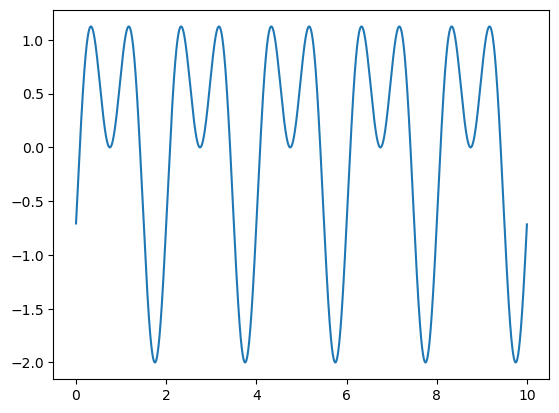

In [3]:
t = np.arange(0,10,0.001)
s = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
plt.plot(t,s)

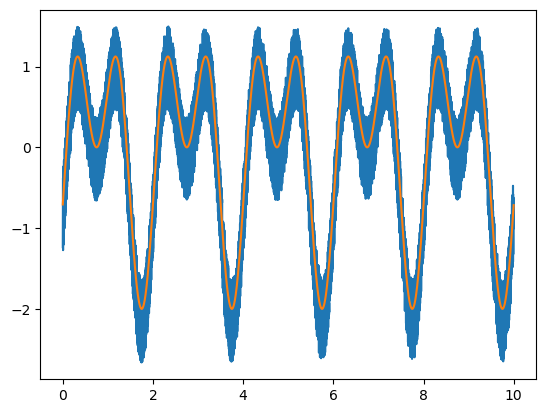

In [4]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))
sn = s+n
plt.plot(t,sn)
plt.plot(t,s)

In [5]:
print(np.min(s)/10, np.max(s)/10, len(t))

-0.2 0.11249965672087192 10000


In [6]:
fil = np.ones(100)

s_for_conv = np.ones(len(s)+2*len(fil)//2-1)
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn
print(len(s_for_conv))

10099


In [7]:
len(s)

10000

In [8]:
s_matrix = []
for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])
print(len(s_matrix))
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

10000
(10000, 100)


In [9]:
c = np.linalg.lstsq(s_matrix, s)
print(c[0])

C:\Users\tushk\AppData\Local\Temp\ipykernel_1096\1955328950.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s)


[0.00335342 0.00325507 0.00302497 0.00294971 0.00277481 0.00293378
 0.00278007 0.00322472 0.00329011 0.00327723 0.0038421  0.00436323
 0.00405096 0.0043991  0.00462613 0.00518798 0.00518057 0.00519395
 0.00522833 0.00568435 0.00600196 0.00598455 0.0060912  0.00597253
 0.00630025 0.00654316 0.00674036 0.00734264 0.00779718 0.00841264
 0.00911347 0.00996922 0.0107814  0.01088076 0.01170144 0.01189073
 0.01291403 0.01334739 0.0140027  0.01492017 0.01623728 0.01728094
 0.01807377 0.01906667 0.02000442 0.02123504 0.02240921 0.02377479
 0.02504766 0.02654044 0.02819025 0.02624193 0.0245515  0.02326951
 0.02233109 0.02149684 0.02089725 0.01987651 0.01829301 0.01755018
 0.0163612  0.015651   0.01491187 0.01378331 0.01327892 0.01287643
 0.01249159 0.01179758 0.0107622  0.00991893 0.0099324  0.00903238
 0.00869296 0.00821481 0.0077755  0.00749572 0.00719256 0.00727621
 0.00681735 0.00632975 0.00602758 0.00594147 0.00573202 0.0056416
 0.00546079 0.00551291 0.00523994 0.00471212 0.00437515 0.00356

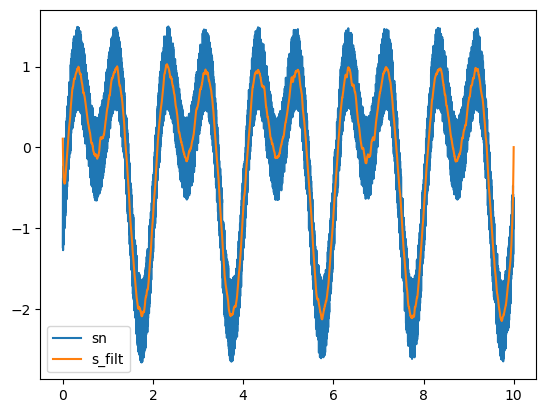

In [10]:
s_filt = s_matrix @ c[0]#[::-1]
plt.plot(t, sn, label = 'sn')
plt.plot(t, s_filt, label = 's_filt')
plt.legend()

In [32]:
filter_order = 100
mu = 0.00001
num_samples = len(sn)   

In [33]:
w=np.zeros(filter_order)
y = []
# Формирование матрицы входных векторов X
for i in range(len(s_matrix)):
    err = s_matrix[i] - w @ s_matrix[i]
    y.append(w @ s_matrix[i])
    x = np.tile(s_matrix[i], ((len(w),1))).T
    w = w + (mu*x) @ err

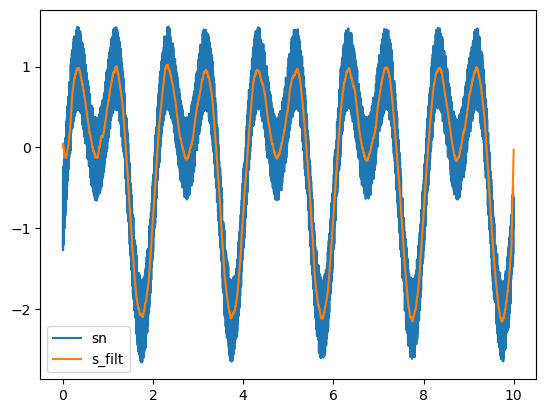

In [34]:
plt.plot(t, sn, label = 'sn')
plt.plot(t, y, label = 's_filt')
plt.legend()